# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### 1. Load the dataset

In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Train.csv')
test = pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Test.csv')
#ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('/kaggle/input/financial-inclusion-in-africa/VariableDefinitions.csv')

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [4]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



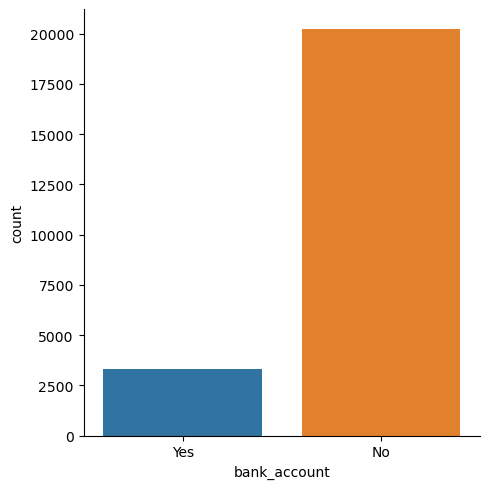

In [6]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train)

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [8]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

If you want to learn how to handle missing data in your dataset, we recommend you read How to [Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

We won’t go further on understanding the dataset because Davis has already published an article about exploratory data analysis (EDA) with the financial Inclusion in Africa dataset. You can read and download the notebook for EDA in the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

In [9]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### 3. Data preparation for machine learning
Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

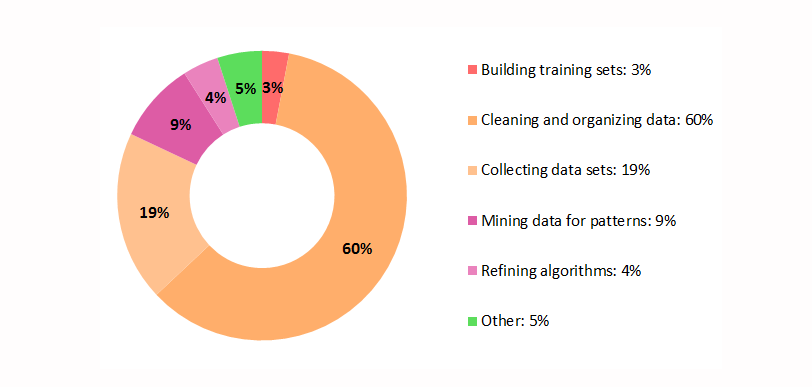

The first step is to separate the independent variables and target(bank_account) from the train data. Then transform the target values from the object data type into numerical by using [LabelEncoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).


In [10]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


The target values have been transformed into numerical datatypes, **1** represents **‘Yes’** and **0** represents **‘No’**.

We have created a simple preprocessing function to:

*   Handle conversion of data types
*   Convert categorical features to numerical features by using [One-hot Encoder and Label Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)
*   Drop uniqueid variable
*   Perform [feature scaling](https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9).

The processing function will be used for both train and test independent variables.

In [11]:
train.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [12]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    #data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    data['relationship_with_head']=data['relationship_with_head'].replace({'Head of Household':0,'Spouse':1,'Child':2,'Parent':3,'Other relative':4,'Other non-relatives':5})
    data['marital_status']=data['marital_status'].replace({'Married/Living together':0,'Single/Never Married':1,'Widowed':2,'Divorced/Seperated':3,'Dont know':4})
    data['education_level']=data['education_level'].replace({'Primary education':0,'No formal education':1,'Secondary education':2,'Tertiary education':3,'Vocational/Specialised training':4,'Other/Dont know/RTA':5})
    data['job_type']=data['job_type'].replace({'Self employed':0,'Informally employed':1,'Farming and Fishing':2,'Remittance Dependent':3,'Other Income':4,'Formally employed Private':5,'No Income':6,'Formally employed Government':7,'Government Dependent':8,'Dont Know/Refuse to answer':9})
    data['country']=data['country'].replace({'Rwanda':0,'Tanzania':1,'Kenya':2,'Uganda':3})

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

Preprocess both train and test dataset.

In [13]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

Observe the first row in the train data.

In [14]:
# the first train row
print(processed_train[:1])

[[0.66666667 1.         0.         1.         0.1        0.0952381
  0.         0.2        0.         0.4        0.        ]]


Observe the shape of the train data.

In [15]:
# shape of the processed train set
print(processed_train.shape)

(23524, 11)


Now we have more independent variables than before (37 variables). This doesn’t mean all these variables are important to train our model. You need to select only important features that can increase the performance of the model. But we will not apply any feature selection technique in this article; if you want to learn and know more about feature selection techniques, we recommend you read the following articles:


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

###4. Model Building and Experiments
A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [16]:
import sklearn.model_selection


In [17]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_test, y_Train, y_test = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.2, random_state=42)

In [28]:
X_train.drop('uniqueid', axis=1, inplace=True)
print(X_train)

       country  year  location_type  cellphone_access  household_size  \
0            2  2018              0                 1               3   
1            2  2018              0                 0               5   
2            2  2018              1                 1               5   
3            2  2018              0                 1               5   
4            2  2018              1                 0               8   
...        ...   ...            ...               ...             ...   
23519        3  2018              0                 1               4   
23520        3  2018              0                 1               2   
23521        3  2018              0                 1               5   
23522        3  2018              1                 1               7   
23523        3  2018              0                 1              10   

       age_of_respondent  gender_of_respondent  relationship_with_head  \
0                     24                     0   

In [29]:
print(len(X_test))

4705


In [41]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

# Base models
base_models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    lgbm_model
    #lgb.LGBMClassifier(random_state=42)
]

# Meta-model
meta_model = lgbm_model

# Create arrays to store the predictions from the base models
base_predictions_train = np.zeros((X_train.shape[0], len(base_models)))
base_predictions_test = np.zeros((X_test.shape[0], len(base_models)))


In [45]:

# Train the base models and make predictions
for i, model in enumerate(base_models):
    model.fit(X_train, y_train)
    base_predictions_train[:, i] = model.predict(X_train)
    base_predictions_test[:, i] = model.predict(X_test)

# Train the meta-model using cross-validation
meta_model.fit(base_predictions_train, y_train)

# Make predictions on the test set using the base models and then the meta-model
stacking_train_predictions = meta_model.predict(base_predictions_train)
stacking_test_predictions = meta_model.predict(base_predictions_test)

# Evaluate the performance of the stacking model
train_accuracy = accuracy_score(y_train, stacking_train_predictions)
test_accuracy = accuracy_score(y_test, stacking_test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Number of features of the model must match the input. Model n_features_ is 2 and input n_features is 11

In [ ]:

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_test, stacking_test_predictions))

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

# XGBoost classifier
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0.2,
    subsample=1.0,
    random_state=42
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# LightGBM classifier
lgb_model = lgb.LGBMClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    subsample=1.0,
    random_state=42
)

# Train the LightGBM model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the LightGBM model
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
print("LightGBM Accuracy:", lgb_accuracy)



XGBoost Accuracy: 0.859298618490967
LightGBM Accuracy: 0.859298618490967


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.859298618490967


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print(1-cv_scores.mean())

Cross-Validation Scores: [0.87120085 0.87226355 0.86801275 0.87247609 0.86373299]
Mean Accuracy: 0.869537246886002
0.13046275311399802


Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

We will be using [**XGBoost**](https://www.datacamp.com/community/tutorials/xgboost-in-python). 

We will start by training these models using the train set after splitting our train dataset.

In [151]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

The evaluation metric for this challenge will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.

This means the **lower** the incorrect percentage we get, the better the model performance.

In [152]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.11264612114771522


Let’s check the confusion matrix for XGB model.

In [153]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

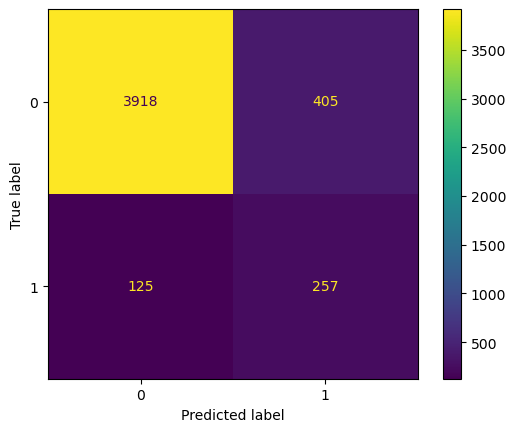

In [154]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf=xg_model
cm = confusion_matrix(xg_y_model, y_val, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

Our XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values). You can learn the best way to deal with imbalanced data here.

One way to increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can skip this cell if you would like. 

In [87]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {
        'gamma': [0.1,0.2,0.3,0.5, 1],
        'subsample': [0.6, 0.8, 1.0,1.2,1.3,1.5],
        'max_depth': [3, 5,10,20]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)        
#{'gamma': 1, 'max_depth': 5, 'min_child_weighth': 1, 'subsample': 0.8}
#{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 1.0}

NameError: name 'xg_model' is not defined

The above source code will evaluate which parameter values for min_child_weight, gamma, subsample and max_depth will give us better performance.

Let’s use these parameter values and see if the XGB model performance will increase.

In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=0.5, subsample=1.0, max_depth=3)
#{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 1.0}
xgb_model.fit(X_Train, y_Train)
y_pred1 = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.11094580233793838


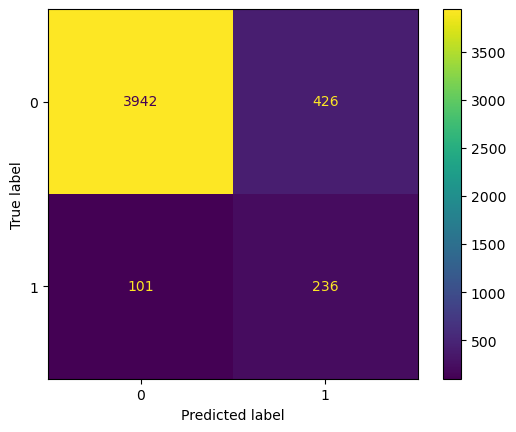

In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clfb=xgb_model
cm = confusion_matrix(y_pred1, y_val, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

Our XGB model has improved from the previous performance of **0.110** to **0.108**.


###5. Making the first submission
After improving the XGBoost model performance, let’s now see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First, we make predictions on the competition test data set.

In [158]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)

Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


In [ ]:
# Create submission DataFrame
test1=pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Test.csv')
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test1["country"],
                           "bank_account": test.bank_account})

Let’s observe the sample results from our submission DataFrame.


In [ ]:
#show the five sample
submission.head(5)


Save results in the CSV file.


In [ ]:
# Create submission csv file csv file
submission.to_csv('submission4.csv', index = False)
#files.download('first_submission.csv') 

We named our submission file a **first_submission.csv**. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload., You also have an option to add comments for each submission.

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************

In [58]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the parameters for the LGBM model
"""lgbm_params = {
    'min_child_weight': 1,
    'subsample': 1.0,
    'max_depth': 3
}"""
lgbm_params={'learning_rate': 0.2, 'max_depth': 3, 'min_child_samples': 100, 'num_leaves': 31, 'subsample': 0.8}

# Create and fit the LGBM model
lgbm_model = lgb.LGBMClassifier(**lgbm_params)
lgbm_model.fit(X_Train, y_Train)
y_pred = lgbm_model.predict(X_test)
print(len(y_pred))
# Calculate the error rate
error_rate = 1 - accuracy_score(y_test, y_pred)
print("Error rate of the LGBM classifier: ", error_rate)


4705
Error rate of the LGBM classifier:  0.11137088204038259


In [59]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Define the parameters for the LGBM model
lgbm_params = {'learning_rate': 0.2, 'max_depth': 3, 'min_child_samples': 100, 'num_leaves': 31, 'subsample': 0.8}

# Create the LGBM model
lgbm_model = lgb.LGBMClassifier(**lgbm_params)

# Perform cross-validation
cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Calculate the mean accuracy
mean_accuracy = cv_scores.mean()

# Print the accuracy scores and mean accuracy
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", 1-mean_accuracy)


Cross-Validation Scores: [0.63953241 0.87120085 0.88352816 0.85292242 0.86840986]
Mean Accuracy: 0.176881257816623


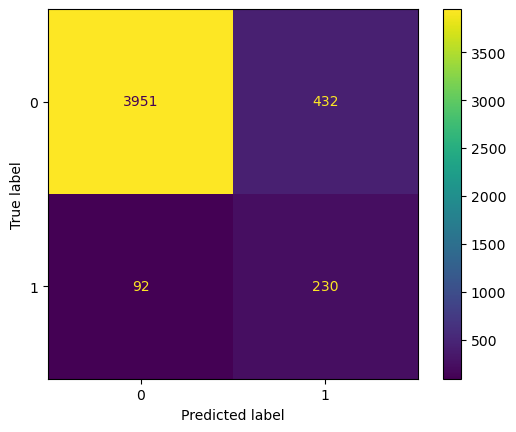

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clfb=lgbm_model.fit(X_Train, y_Train)
cm = confusion_matrix(y_pred, y_test, labels=clfb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clfb.classes_)
disp.plot()
plt.show()

In [36]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for grid search
param_grid = {
    'num_leaves': [31, 63, 127],
    'max_depth': [3, 5, -1],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create LightGBM classifier
lgbm_model = lgb.LGBMClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(lgbm_model, param_grid, scoring='accuracy', cv=3)

# Fit the model on training data
grid_search.fit(X_Train, y_Train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


NameError: name 'y_Val' is not defined

In [162]:

# Create a new LGBM classifier with the best parameters
best_lgbm_model = lgb.LGBMClassifier(**best_params)
best_lgbm_model.fit(X_Train, y_Train)

# Make predictions on the validation data
y_pred = best_lgbm_model.predict(X_Val)

# Calculate the error rate
error_rate = 1 - accuracy_score(y_val, y_pred)
print("Error rate of the best LGBM classifier: ", error_rate)


Error rate of the best LGBM classifier:  0.11137088204038259


In [163]:
print(best_params)

{'learning_rate': 0.2, 'max_depth': 3, 'min_child_samples': 100, 'num_leaves': 31, 'subsample': 0.8}


In [164]:
# Calculate the error rate
error_rate = 1 - accuracy_score(y_val, y_pred)
print("Error rate of the best LGBM classifier: ", error_rate)


Error rate of the best LGBM classifier:  0.11137088204038259


In [63]:
# Get the predicted result for the test Data
test.bank_account = lgbm_model.predict(processed_test)

/tmp/ipykernel_32/2935245723.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.bank_account = lgbm_model.predict(processed_test)


In [64]:
# Create submission DataFrame
test1=pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Test.csv')
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test1["country"],
                           "bank_account": test.bank_account})
#show the five sample
submission.head(5)


,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clfb=best_lgbm_model
cm = confusion_matrix(y_pred, y_val, labels=clfb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clfb.classes_)
disp.plot()
plt.show()

NameError: name 'best_lgbm_model' is not defined

In [41]:
# Create submission csv file csv file
submission.to_csv('submission6.csv', index = False)


# MODEL ENSEMBLING


In [173]:
from xgboost import XGBClassifier

lgb_model = best_lgbm_model
#lgb_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model = XGBClassifier(min_child_weight=1, gamma=0.5, subsample=1.0, max_depth=3)
#xgb_model.fit(X_train, y_train)

# Make predictions on the validation data using each model
#lgb_preds = lgb_model.predict(X_val)
#xgb_preds = xgb_model.predict(X_val)

# Combine predictions by averaging
ensemble_preds = (y_pred1 + y_pred) / 2

# Round the predictions to the nearest integer (for classification)
ensemble_preds = ensemble_preds.round().astype(int)

# Calculate accuracy of the ensemble predictions
ensemble_accuracy = accuracy_score(y_val, ensemble_preds)
error_rate = 1 - ensemble_accuracy
print("Error rate of the best LGBM classifier: ", error_rate)

Error rate of the best LGBM classifier:  0.11052072263549417


In [174]:
# Get the predicted result for the test Data
#test.bank_account = best_lgbm_model.predict(processed_test)
test.bank_account = ensemble_preds


4705


In [179]:
# Create submission DataFrame
test1=pd.read_csv('/kaggle/input/financial-inclusion-in-africa/Test.csv')
print(len(test1))
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test1["country"],
                           "bank_account": test.bank_account})
#show the five sample
submission.head(5)


10086


ValueError: array length 4705 does not match index length 10086

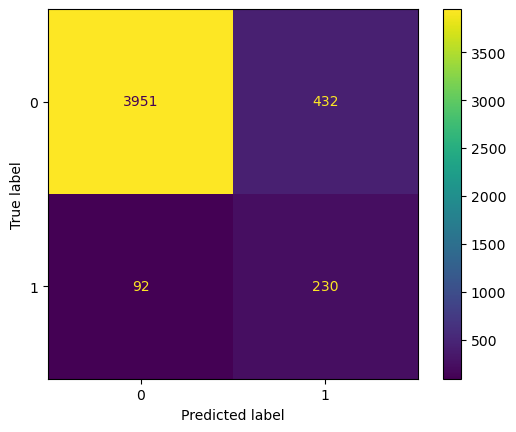

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clfb=best_lgbm_model
cm = confusion_matrix(y_pred, y_val, labels=clfb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clfb.classes_)
disp.plot()
plt.show()

In [181]:
# Create submission csv file csv file
submission.to_csv('submission7.csv', index = False)
